In [8]:

import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [9]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [10]:
from src import soporte_correlacion as sp_corr

In [11]:
df = pd.read_csv(r'Files/datos_limpios.csv', index_col=0)

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


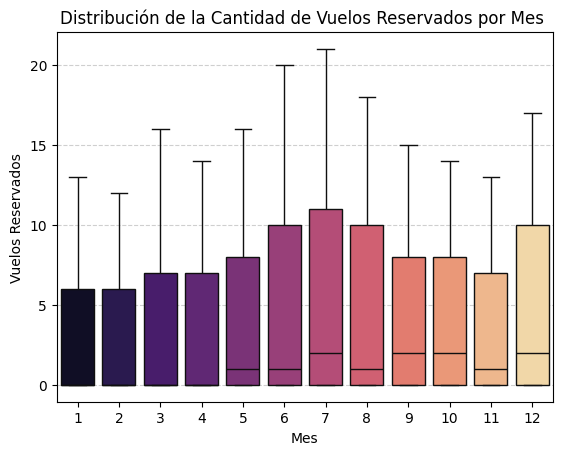

In [12]:
sns.boxplot(x='Month', y='Flights Booked', data=df, palette='magma')
plt.title('Distribución de la Cantidad de Vuelos Reservados por Mes ')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.show()

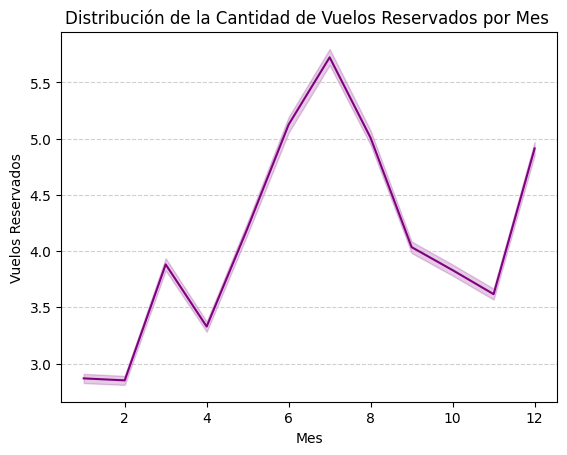

In [13]:
sns.lineplot(x='Month', y='Flights Booked', data=df, color='purple')
plt.title('Distribución de la Cantidad de Vuelos Reservados por Mes ')
plt.xlabel('Mes')
plt.ylabel('Vuelos Reservados')
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.show()

El pico central es el valor más representativo, claramente se ve una tendencia estacional. en los meses de verano son la mayorias de reservas, así como se vé un ascenso en el mes de Diciembre 

## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

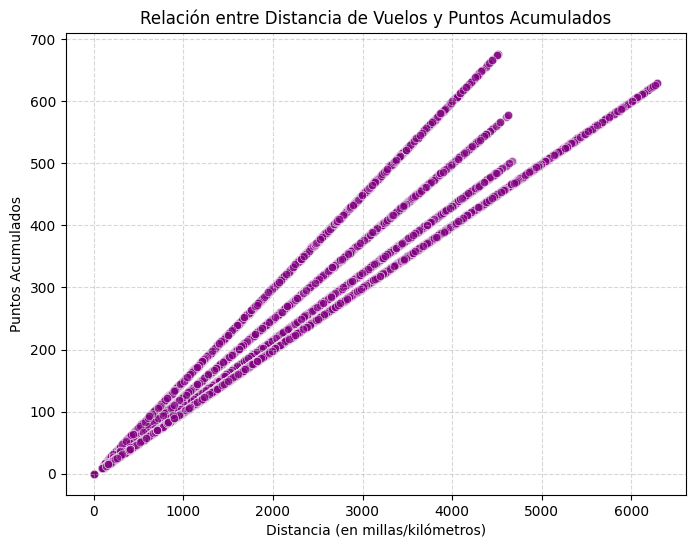

In [14]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Distance', y='Points Accumulated', data=df, alpha=0.6, color='purple')

plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia (en millas/kilómetros)')
plt.ylabel('Puntos Acumulados')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show() #

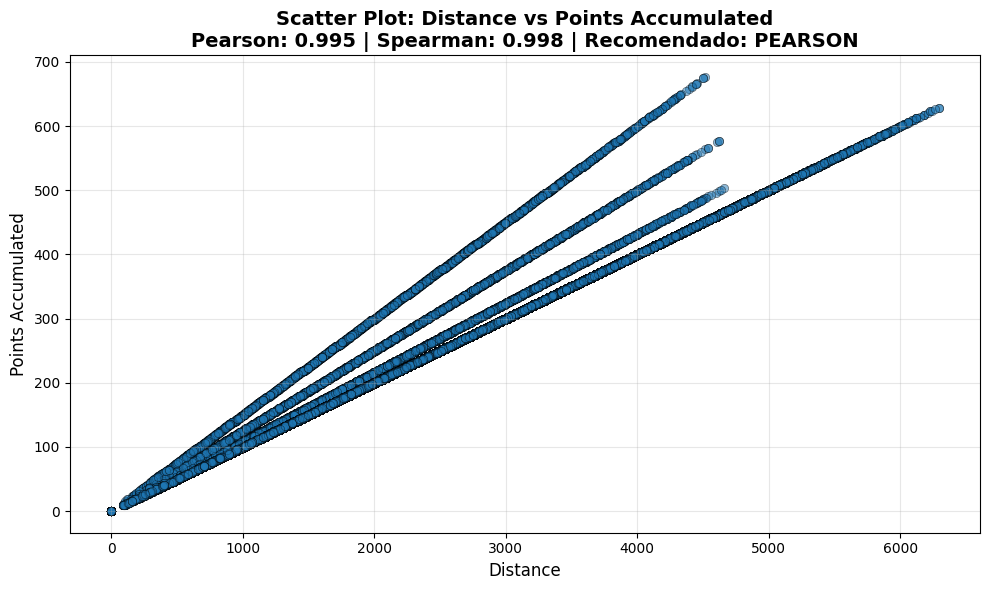

In [15]:

resultado_corr = sp_corr.comparar_correlaciones(
    df=df,
    var1_name='Distance',
    var2_name='Points Accumulated',
    mostrar_plot=True # Muestra el scatter plot
)


In [16]:
resultado_corr

{'pearson': np.float64(0.9945637211531331),
 'spearman': np.float64(0.9980655959223752),
 'diferencia': np.float64(0.0035018747692421304),
 'recomendacion': 'pearson',
 'valor_recomendado': np.float64(0.9945637211531331),
 'fuerza': 'muy fuerte',
 'direccion': 'positiva',
 'n_validos': 405624,
 'n_total': 405624,
 'interpretacion': '\n✅ USAR PEARSON (r = 0.995)\n   \n   Razón: La diferencia entre Pearson y Spearman es pequeña (0.004).\n   Esto indica una relación aproximadamente lineal sin outliers significativos.\n   \n   Pearson: 0.995\n   Spearman: 0.998\n   \n   Datos utilizados: 405624/405624 (100.0%)\n        \n   Fuerza de la relación: muy fuerte positiva'}

El resultado confirma la relación que se esperaba entre la distancia volada y los puntos obtenidos en un programa de lealtad.

## ¿Cuál es la distribución de los clientes por provincia o estado?


In [17]:

conteo_provincias = df['Province'].value_counts().reset_index()
conteo_provincias.columns = ['Province', 'Total Clientes']

In [18]:
conteo_provincias = conteo_provincias.sort_values(by='Total Clientes', ascending=False)

| Province         |   Total Clientes |
|:-----------------|-----------------:|
| Ontario          |           130896 |
| British Columbia |           106848 |
| Quebec           |            79968 |
| Alberta          |            23400 |
| Manitoba         |            15984 |


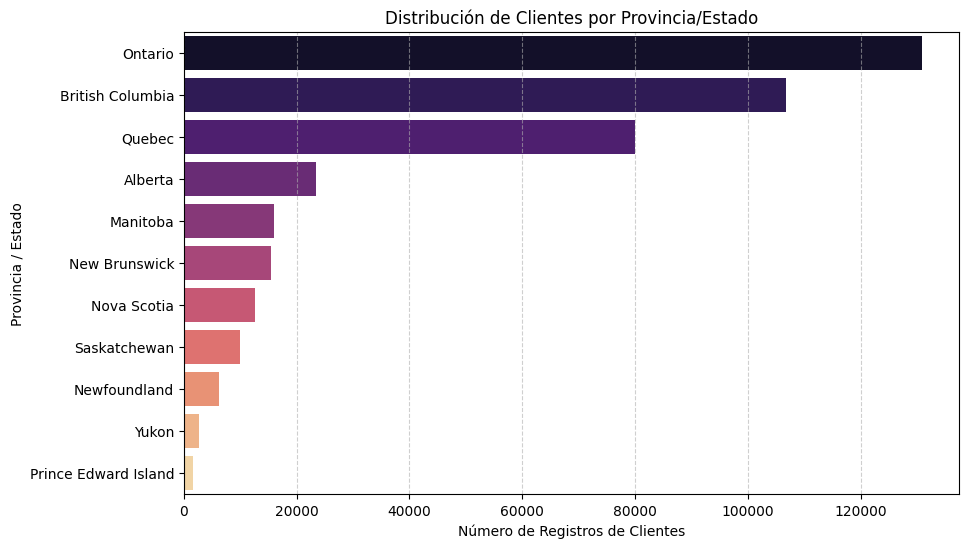

In [19]:

print(conteo_provincias.head().to_markdown(index=False))

plt.figure(figsize=(10, 6))

sns.barplot(x='Total Clientes', y='Province', data=conteo_provincias, palette='magma')
plt.title('Distribución de Clientes por Provincia/Estado')
plt.xlabel('Número de Registros de Clientes')
plt.ylabel('Provincia / Estado')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show() #

El gráfico muestra lo que confirma la tabla, que los clientes están concentrados en los nucleos más grandes de Canadá: 

 Ontario con 130896 de registrados; 
 British Columbia con 106848 de registrados; 
 Quebec con 79968 de registrados. 

## . ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [20]:
df_salario_educacion = df.groupby('Education')['Salary_Imputed'].mean().reset_index()
df_salario_educacion.rename(columns={'Salary_Imputed': 'Salario Promedio'}, inplace=True)

In [21]:
df_salario_educacion

,Education,Salario Promedio
0,Bachelor,72670.767426
1,College,73479.000000
2,Doctor,178335.439516
3,High School or Below,61142.237374
4,Master,103767.494163


Salario Promedio por Nivel Educativo
           Education  Salario Promedio
            Bachelor        €72,670.77
             College        €73,479.00
              Doctor       €178,335.44
High School or Below        €61,142.24
              Master       €103,767.49


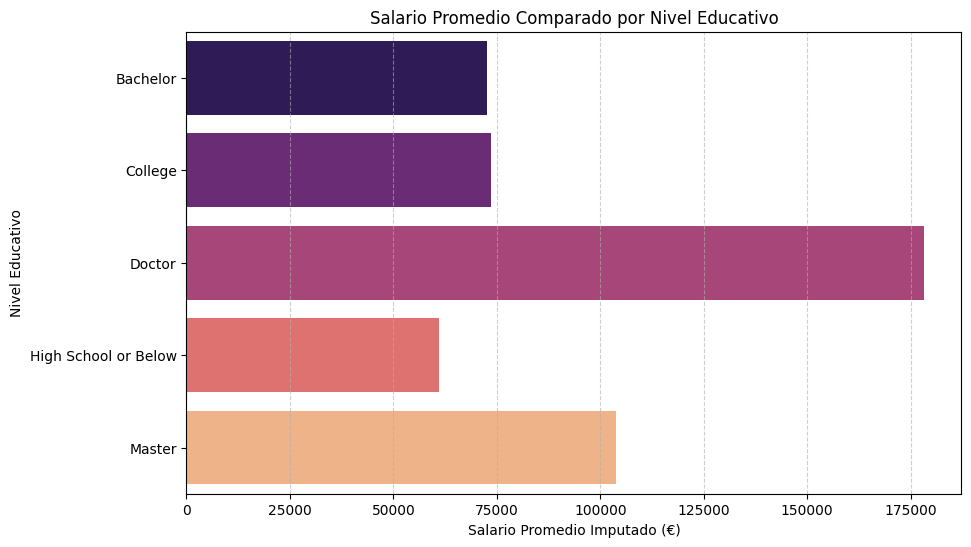

In [22]:

print("Salario Promedio por Nivel Educativo")
print(df_salario_educacion.to_string(index=False, float_format="€{:,.2f}".format))


plt.figure(figsize=(10, 6))

sns.barplot(x='Salario Promedio', y='Education', data=df_salario_educacion, palette='magma')
plt.title('Salario Promedio Comparado por Nivel Educativo')
plt.xlabel('Salario Promedio Imputado (€)')
plt.ylabel('Nivel Educativo')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show() #

Es notorio que a mayor nivel educativo mayor salario promedio

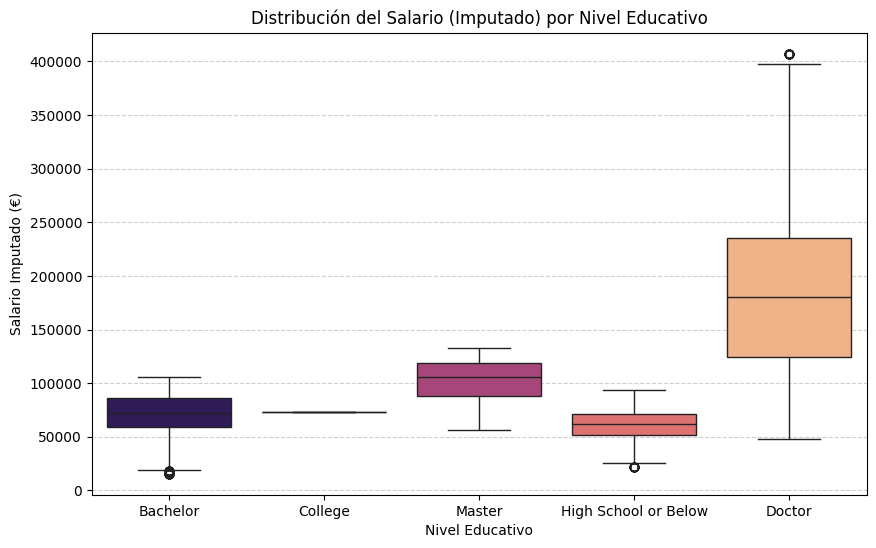

In [23]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Education',y='Salary_Imputed', data=df,palette='magma')
plt.title('Distribución del Salario (Imputado) por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Imputado (€)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show() #

Con  este gráfico también podemos observar los valores atípicos fuera de los 'bigotes'


##  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 




 Conteo y Proporción de Tipos de Tarjeta 
| Loyalty Card   |   Total Clientes |   Proporción (%) |
|:---------------|-----------------:|-----------------:|
| Star           |        184224.00 |            45.42 |
| Nova           |        137568.00 |            33.92 |
| Aurora         |         83832.00 |            20.67 |


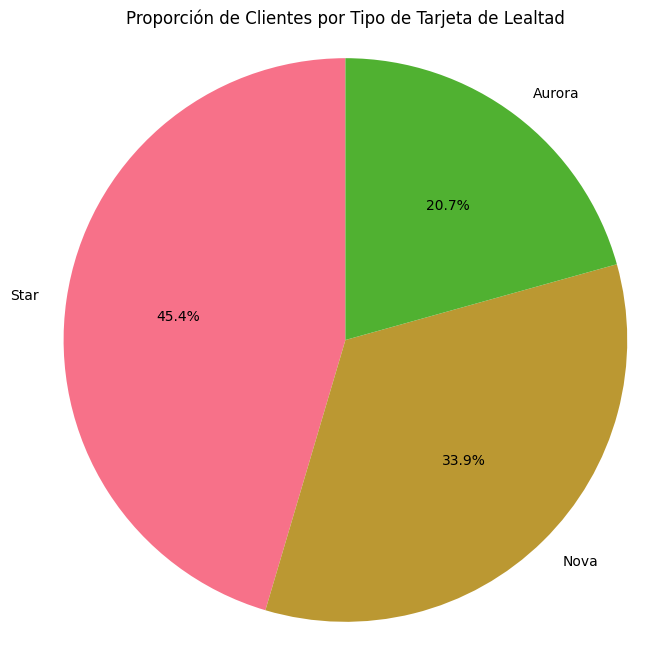

In [24]:
conteo_tarjetas = df['Loyalty Card'].value_counts()
print(" Conteo y Proporción de Tipos de Tarjeta ")
df_proporcion = conteo_tarjetas.to_frame(name='Total Clientes')
df_proporcion['Proporción (%)'] = (df_proporcion['Total Clientes'] / df_proporcion['Total Clientes'].sum())*100
print(df_proporcion.to_markdown(floatfmt=".2f"))


plt.figure(figsize=(8, 8))
plt.pie(conteo_tarjetas.values, labels=conteo_tarjetas.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('husl'))
plt.title('Proporción de Clientes por Tipo de Tarjeta de Lealtad')
plt.axis('equal') 
plt.show()

## ¿Cómo se distribuyen los clientes según su estado civil y género?

In [27]:
df_conteo_cruzado = df.groupby(['Marital Status', 'Gender']).size().reset_index(name='Total Clientes')

In [28]:
df_conteo_cruzado

,Marital Status,Gender,Total Clientes
0,Divorced,Female,30888
1,Divorced,Male,30288
2,Married,Female,117816
3,Married,Male,117984
4,Single,Female,54936
5,Single,Male,53712


Conteo de Clientes por Estado Civil y Género 
Marital Status Gender  Total Clientes
      Divorced Female           30888
      Divorced   Male           30288
       Married Female          117816
       Married   Male          117984
        Single Female           54936
        Single   Male           53712


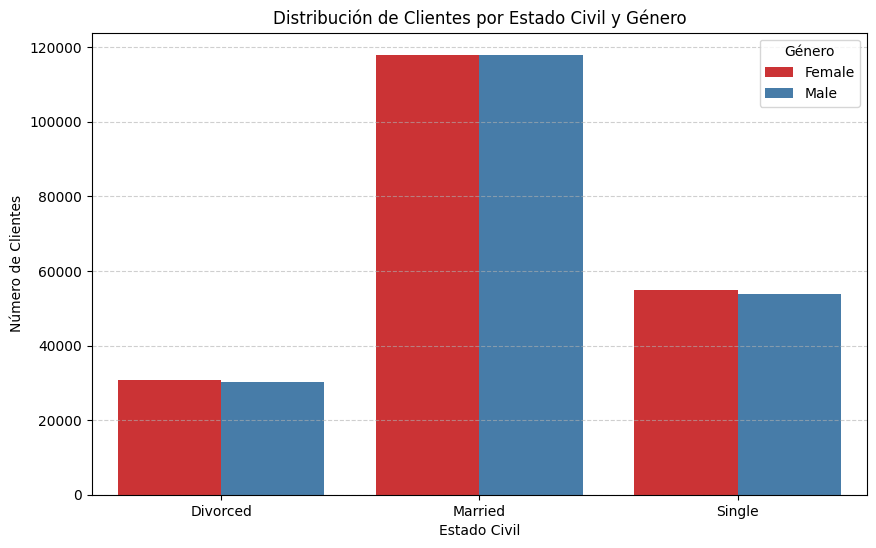

In [ ]:


print("Conteo de Clientes por Estado Civil y Género ")
print(df_conteo_cruzado.to_string(index=False))

plt.figure(figsize=(10, 6))

sns.barplot(x='Marital Status', y='Total Clientes',hue='Gender',  data=df_conteo_cruzado, palette='Set1')

plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.legend(title='Género')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show() 
